In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
Crop_Land_Nutrient_Balance_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Crop_Land_Nutrient_Balance.csv")
Crop_Land_Nutrient_Balance_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code','Item Code', 'Year Code', 'Note'], axis=1,inplace=True)
Crop_Land_Nutrient_Balance_df.rename(columns={'Element': 'Nutrients', 'Item': 'Nutrients_type', 'Value': 'Nutrients_Value',  'Unit': 'Nutrients_Unit', 'Flag': 'Nutrients_Flag', 'Flag Description': 'Nutrients_Flag_Description'}, inplace=True)
Crop_Land_Nutrient_Balance_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Nutrients'].isin(['Cropland nitrogen', 'Cropland phosphorus', 'Cropland potassium'])]
Crop_Land_Nutrient_Balance_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Year'].between(2000, 2008)]
# print(Crop_Land_Nutrient_Balance_df['Nutrients'].unique())
Crop_Land_Nutrient_Balance_df.head()

,Area,Nutrients,Nutrients_type,Year,Nutrients_Unit,Nutrients_Value,Nutrients_Flag,Nutrients_Flag_Description
234,Bangladesh,Cropland nitrogen,Mineral fertilizers,2000,t,995826.000,E,Estimated value
236,Bangladesh,Cropland phosphorus,Mineral fertilizers,2000,t,109140.828,E,Estimated value
238,Bangladesh,Cropland potassium,Mineral fertilizers,2000,t,90055.000,E,Estimated value
240,Bangladesh,Cropland nitrogen,Mineral fertilizers,2001,t,1058172.500,E,Estimated value
242,Bangladesh,Cropland phosphorus,Mineral fertilizers,2001,t,111919.238,E,Estimated value


In [43]:
Crop_Land_Nutrient_Balance_df['Nutrients_Unit'].unique()

array(['t'], dtype=object)

In [46]:
Crop_Land_Nutrient_Balance_df.isna().sum()

Area                            0
Nutrients                       0
Nutrients_type                  0
Year                            0
Nutrients_Unit                  0
Nutrients_Value               405
Nutrients_Flag                  0
Nutrients_Flag_Description      0
dtype: int64

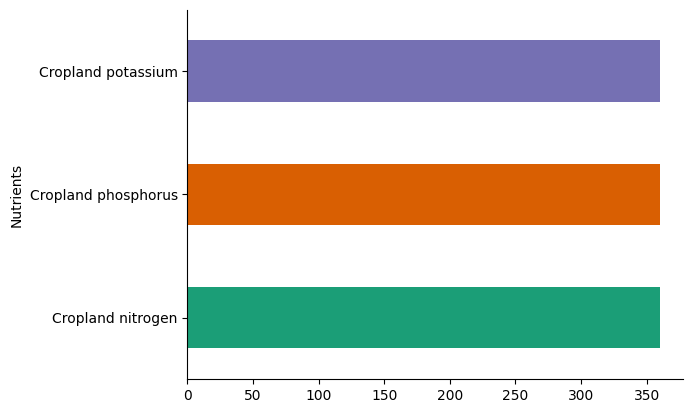

In [53]:
# @title Nutrients
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Land_Nutrient_Balance_df.groupby('Nutrients').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x600 with 0 Axes>

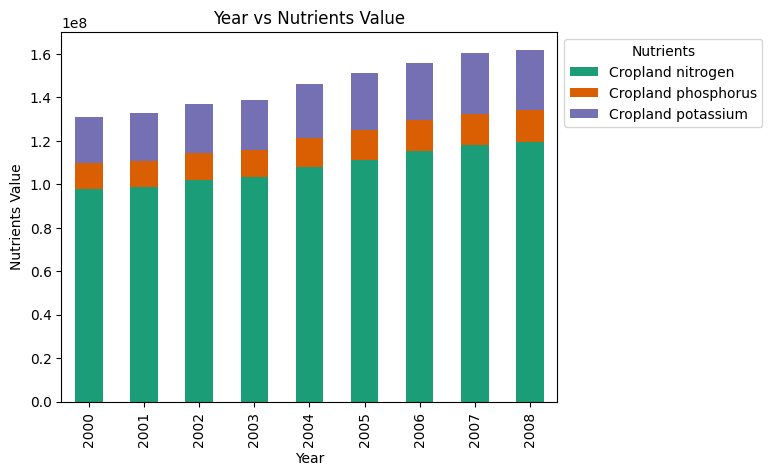

In [47]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Crop_Land_Nutrient_Balance_df.groupby(['Year', 'Nutrients'])['Nutrients_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Nutrients Value')
plt.title('Year vs Nutrients Value')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


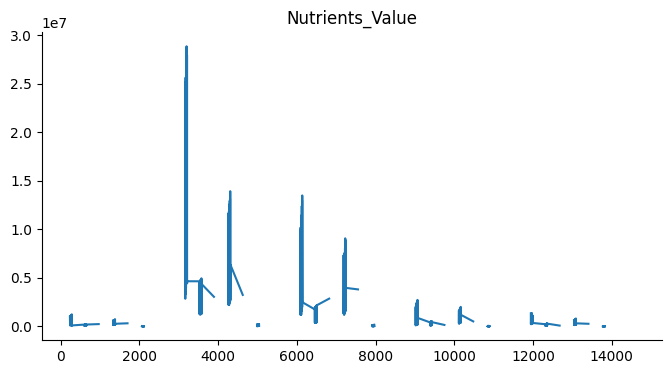

In [6]:
# @title Nutrients_Value

from matplotlib import pyplot as plt
Crop_Land_Nutrient_Balance_df['Nutrients_Value'].plot(kind='line', figsize=(8, 4), title='Nutrients_Value')
plt.gca().spines[['top', 'right']].set_visible(False)

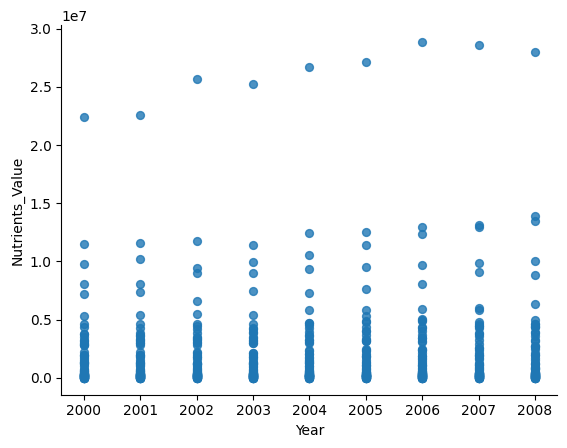

In [7]:
# @title Year vs Nutrients_Value

from matplotlib import pyplot as plt
Crop_Land_Nutrient_Balance_df.plot(kind='scatter', x='Year', y='Nutrients_Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

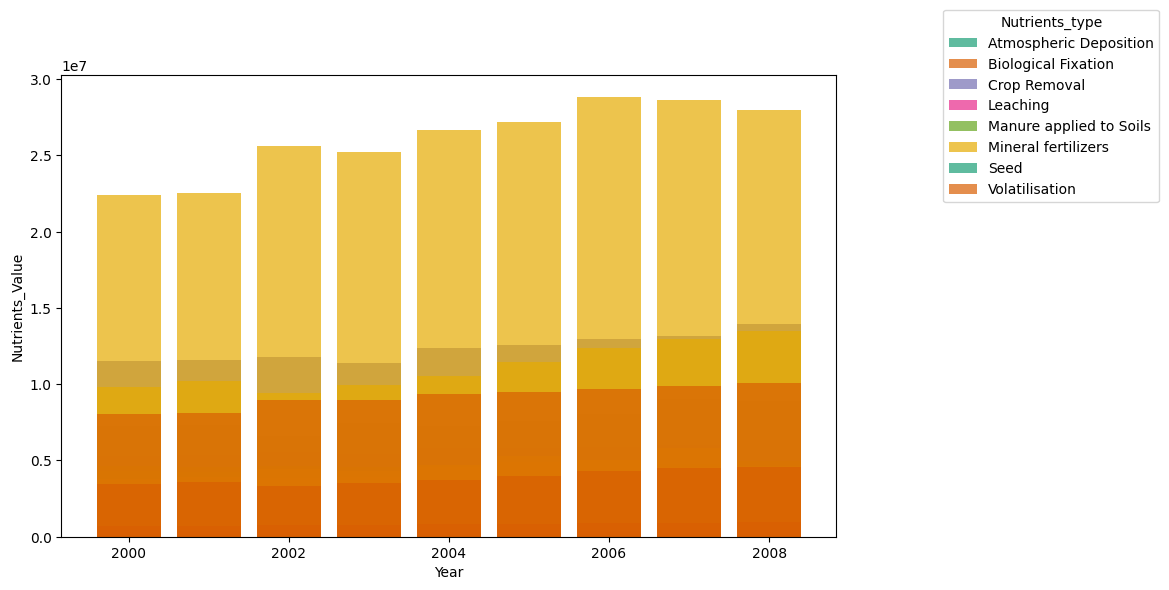

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to plot each series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Nutrients_Value']
    plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Sort DataFrame by 'Year' column
df_sorted = Crop_Land_Nutrient_Balance_df.sort_values('Year', ascending=True)

# Iterate over each series grouped by 'Nutrients_type' and plot
for i, (series_name, series) in enumerate(df_sorted.groupby('Nutrients_type')):
    _plot_series(series, series_name, i)

# Set legend and axis labels
fig.legend(title='Nutrients_type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Nutrients_Value')

# Show plot
plt.show()

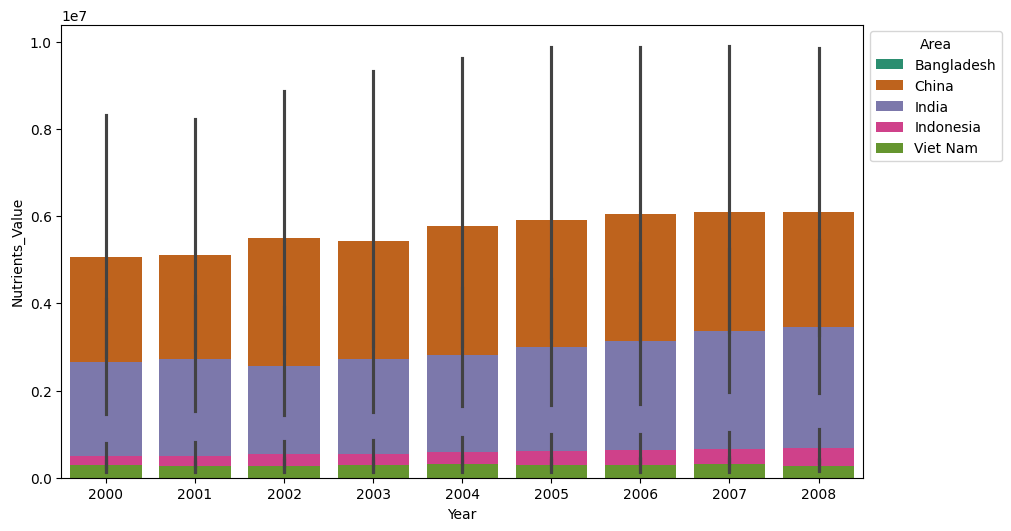

In [57]:
# Function to plot stacked bar graph for each series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Nutrients_Value']

    # Use seaborn's barplot to create stacked bars
    sns.barplot(x=xs, y=ys, label=series_name, color=palette[series_index % len(palette)], ax=ax)

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Use constrained_layout for better layout
df_sorted = Crop_Land_Nutrient_Balance_df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Nutrients_Value')
plt.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [10]:
Crop_Production_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Crop_Production.csv")
Crop_Production_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code','Item Code (CPC)', 'Year Code' , 'Note'], axis=1,inplace=True)
Crop_Production_df.rename(columns={'Element': 'Prod_type', 'Value': 'Prod_Value', 'Item': 'Crop_Name', 'Value': 'Crop_Production_Value',  'Unit': 'Crop_Production_Unit', 'Flag': 'Crop_Production_Flag', 'Flag Description': 'Crop_Production_Flag_Description'}, inplace=True)
Crop_Production_df = Crop_Production_df[Crop_Production_df['Year'].between(2000, 2008)]
# Crop_Production_df = Crop_Land_Nutrient_Balance_df[Crop_Land_Nutrient_Balance_df['Nutrients'].isin(['Cropland nitrogen', 'Cropland phosphorus', 'Cropland potassium'])]
# print(Crop_Land_Nutrient_Balance_df['Nutrients'].unique())
Crop_Production_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Crop_Production_Flag,Crop_Production_Flag_Description
117,Bangladesh,Area harvested,Barley,2000,ha,6880.0,A,Official figure
118,Bangladesh,Yield,Barley,2000,100 g/ha,7267.0,A,Official figure
119,Bangladesh,Production,Barley,2000,t,5000.0,A,Official figure
120,Bangladesh,Area harvested,Barley,2001,ha,5668.0,A,Official figure
121,Bangladesh,Yield,Barley,2001,100 g/ha,7057.0,A,Official figure


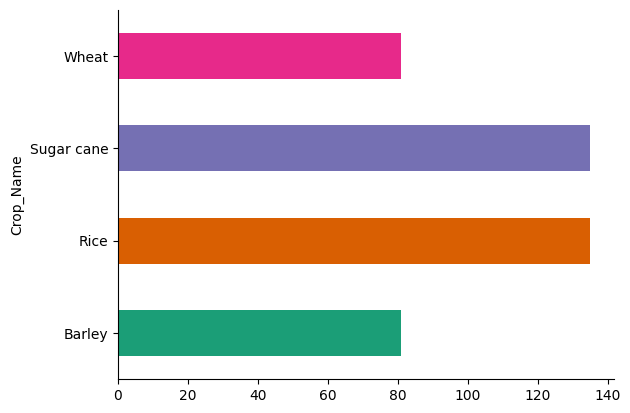

In [11]:
# @title Crop_Name

from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Crop_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

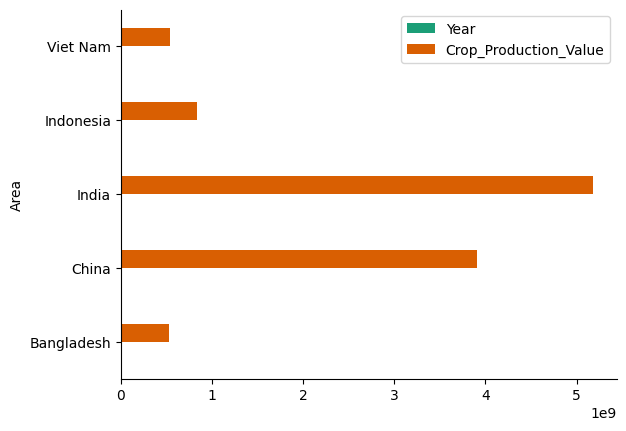

In [113]:
# @title Area

from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Area').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

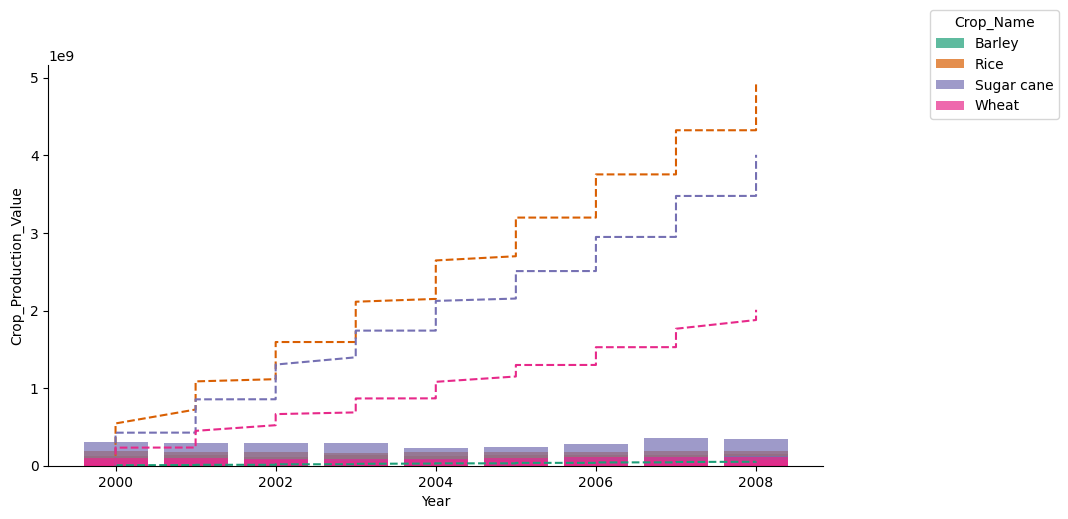

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

# Function to plot stacked bar for each crop
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Crop_Production_Value']
    cumulative_ys = ys.cumsum()

    plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)
    plt.plot(xs, cumulative_ys, color=palette[series_index % len(palette)], linestyle='--')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5.2))

# Sort the DataFrame by year
df_sorted = Crop_Production_df.sort_values('Year', ascending=True)

# Iterate over each crop and plot its stacked bar
for i, (series_name, series) in enumerate(df_sorted.groupby('Crop_Name')):
    _plot_series(series, series_name, i)

# Add legend outside the plot
fig.legend(title='Crop_Name', bbox_to_anchor=(1, 1), loc='upper left')

# Customize labels and remove spines
plt.xlabel('Year')
plt.ylabel('Crop_Production_Value')
sns.despine(fig=fig, ax=ax)

plt.show()

In [15]:
Temperature_Change_On_Land_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Temperature_Change_On_Land.csv")
Temperature_Change_On_Land_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Months Code', 'Year Code'],  axis=1,inplace=True)
Temperature_Change_On_Land_df.rename(columns={'Element': 'Temp_Change', 'Value': 'TMP_Value',  'Unit': 'TMP_Unit', 'Flag': 'TMP_Flag', 'Flag Description': 'TMP_Description'}, inplace=True)
Temperature_Change_On_Land_df = Temperature_Change_On_Land_df[Temperature_Change_On_Land_df['Year'].between(2000, 2008)]
Temperature_Change_On_Land_df = Temperature_Change_On_Land_df[Temperature_Change_On_Land_df['Months'].isin(['January','February','March' ,'April' ,'May' ,'June','July','August','September','October','November','December'])]
# print(Temperature_Change_On_Land_df['Months'].unique())
Temperature_Change_On_Land_df.head()

,Area,Temp_Change,Months,Year,TMP_Unit,TMP_Value,TMP_Flag,TMP_Description
39,Bangladesh,Temperature change,January,2000,°c,0.532,E,Estimated value
40,Bangladesh,Temperature change,January,2001,°c,-0.388,E,Estimated value
41,Bangladesh,Temperature change,January,2002,°c,0.832,E,Estimated value
42,Bangladesh,Temperature change,January,2003,°c,-1.236,E,Estimated value
43,Bangladesh,Temperature change,January,2004,°c,-0.055,E,Estimated value


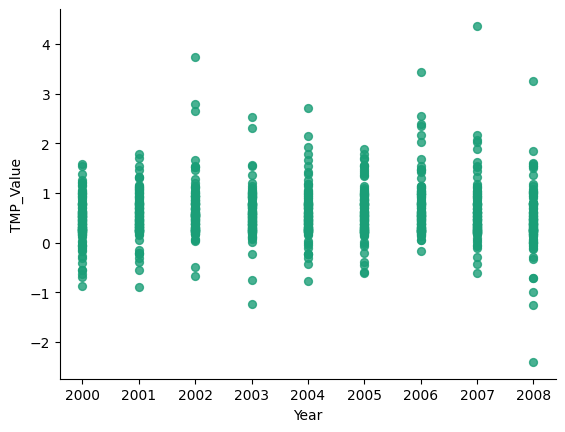

In [48]:
# @title Year vs TMP_Value

from matplotlib import pyplot as plt
Temperature_Change_On_Land_df.plot(kind='scatter', x='Year', y='TMP_Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-16-6add2ebde202>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(Temperature_Change_On_Land_df, x='TMP_Value', y='Area', inner='box', palette='Dark2')


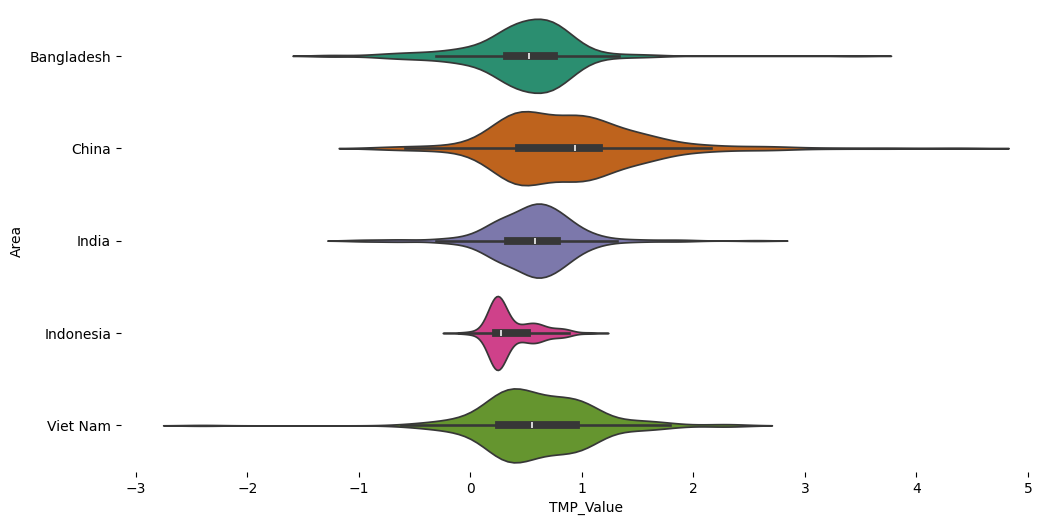

In [16]:
# @title Area vs TMP_Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Temperature_Change_On_Land_df['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Temperature_Change_On_Land_df, x='TMP_Value', y='Area', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

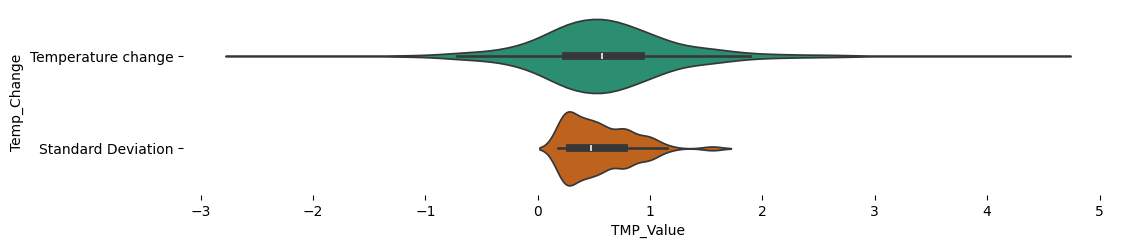

In [79]:
# @title Temp_Change vs TMP_Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Temperature_Change_On_Land_df['Temp_Change'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Temperature_Change_On_Land_df, x='TMP_Value', y='Temp_Change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

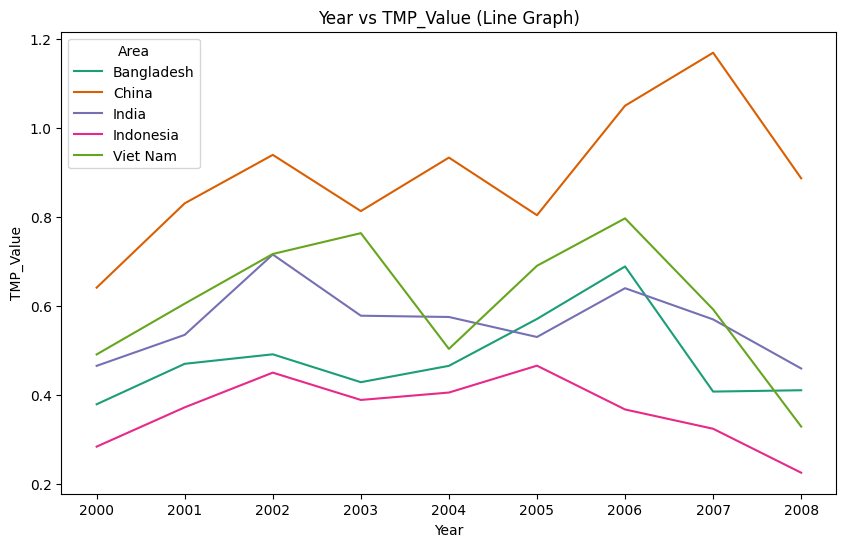

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Temperature_Change_On_Land_df, x='Year', y='TMP_Value', hue='Area',ci=None, palette='Dark2')
plt.xlabel('Year')
plt.ylabel('TMP_Value')
plt.title('Year vs TMP_Value (Line Graph)')
plt.legend(title='Area')
plt.show()

In [20]:
Land_Use_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Land_Use.csv")
Land_Use_df.drop([ 'Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code', 'Year Code', 'Note'],  axis=1,inplace=True)
Land_Use_df.rename(columns={'Item': 'Area_type','Value':'Area Value', 'Element': 'Land_Use_Element', 'Unit': 'Land_Use_Unit', 'Flag': 'Land_Use_Flag', 'Flag Description': 'Land_Use_Flag_Description'}, inplace=True)
Land_Use_df = Land_Use_df[Land_Use_df['Year'].between(2000, 2008)]
Land_Use_df = Land_Use_df[Land_Use_df['Area_type'].isin(['Agricultural land','Cropland','Arable land'])]
# print(Land_Use_df['Area_type'].unique())
Land_Use_df.head()

,Area,Land_Use_Element,Area_type,Year,Land_Use_Unit,Area Value,Land_Use_Flag,Land_Use_Flag_Description
100,Bangladesh,Area,Agricultural land,2000,1000 ha,9400.0,I,Imputed value
101,Bangladesh,Area,Agricultural land,2001,1000 ha,9403.0,I,Imputed value
102,Bangladesh,Area,Agricultural land,2002,1000 ha,9353.0,I,Imputed value
103,Bangladesh,Area,Agricultural land,2003,1000 ha,9328.0,I,Imputed value
104,Bangladesh,Area,Agricultural land,2004,1000 ha,9323.0,I,Imputed value


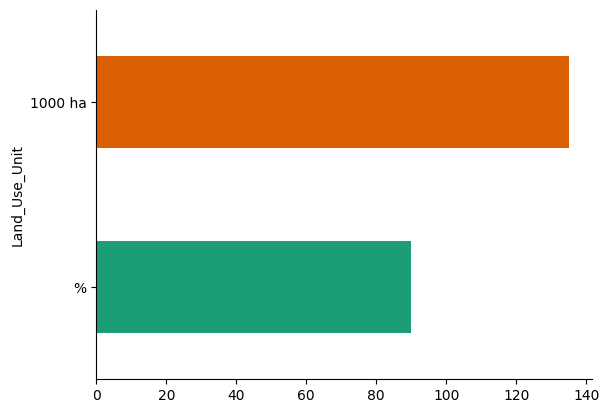

In [21]:
# @title Land_Use_Unit

from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Land_Use_Unit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

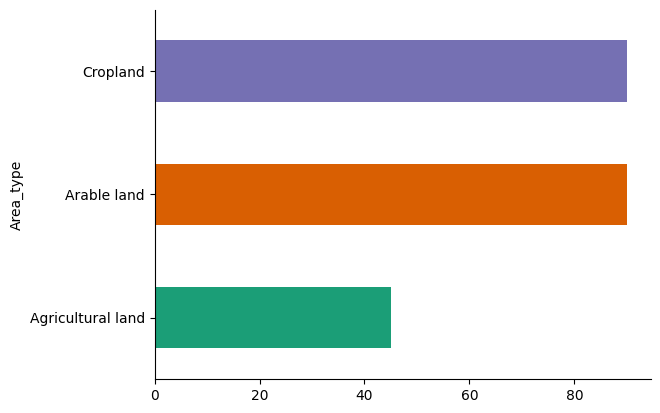

In [115]:
# @title Area_type

from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Area_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

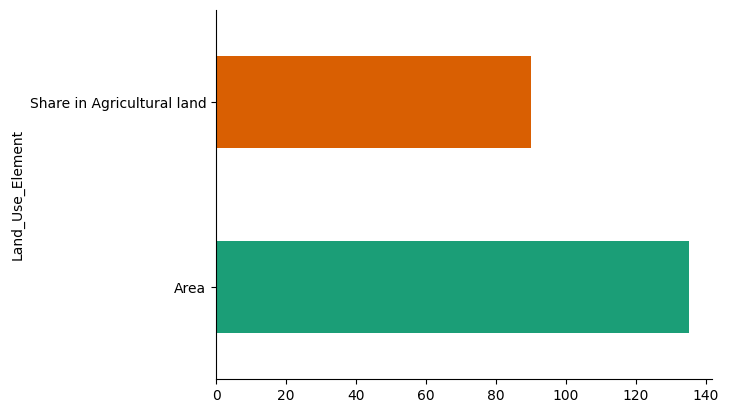

In [74]:
# @title Land_Use_Element

from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Land_Use_Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

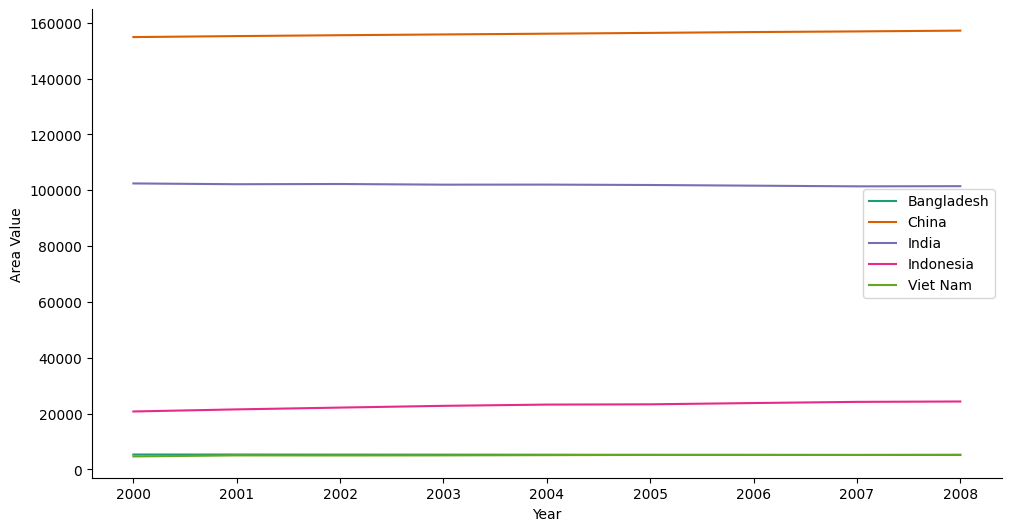

In [81]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Area Value']

    sns.lineplot(x=xs, y=ys, label=series_name,ci=None, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = Land_Use_df.sort_values('Year', ascending=True)

for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)

sns.despine(fig=fig, ax=ax)

plt.xlabel('Year')
plt.ylabel('Area Value')

plt.show()


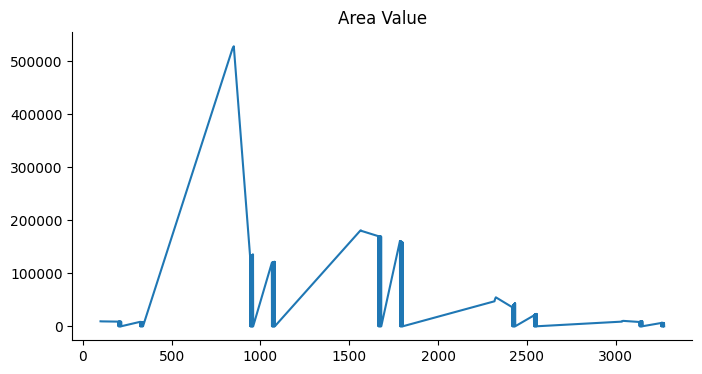

In [25]:
# @title Area Value

from matplotlib import pyplot as plt
Land_Use_df['Area Value'].plot(kind='line', figsize=(8, 4), title='Area Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
Emission_Total_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Emission_Total.csv")
Emission_Total_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code',
       'Source Code', 'Source', 'Note'],  axis=1,inplace=True)
Emission_Total_df.rename(columns={'Element': 'Emissions','Value': "Emission_Value",'Item':'Crop_Name', 'Value': 'Emission_Total_Value',  'Unit': 'Emission_Total_Unit', 'Flag': 'Emission_Total_Flag', 'Flag Description': 'Emission_Total_Flag_Description'}, inplace=True)
Emission_Total_df = Emission_Total_df[Emission_Total_df['Year'].between(2000, 2008)]
Emission_Total_df= Emission_Total_df[Emission_Total_df['Emissions'].isin(['Crops total (Emissions N2O)' ,'Crop residues (N content)','Crops total (Emissions CH4)'])]
print(Emission_Total_df['Emissions'].unique())
Emission_Total_df.head()

['Crops total (Emissions N2O)' 'Crop residues (N content)'
 'Crops total (Emissions CH4)']


,Area,Emissions,Crop_Name,Year,Emission_Total_Unit,Emission_Total_Value,Emission_Total_Flag,Emission_Total_Flag_Description
195,Bangladesh,Crops total (Emissions N2O),Barley,2000,kt,0.0017,E,Estimated value
196,Bangladesh,Crop residues (N content),Barley,2000,kg,90695.0731,E,Estimated value
200,Bangladesh,Crops total (Emissions N2O),Barley,2001,kt,0.0014,E,Estimated value
201,Bangladesh,Crop residues (N content),Barley,2001,kg,73453.3647,E,Estimated value
205,Bangladesh,Crops total (Emissions N2O),Barley,2002,kt,0.0010,E,Estimated value


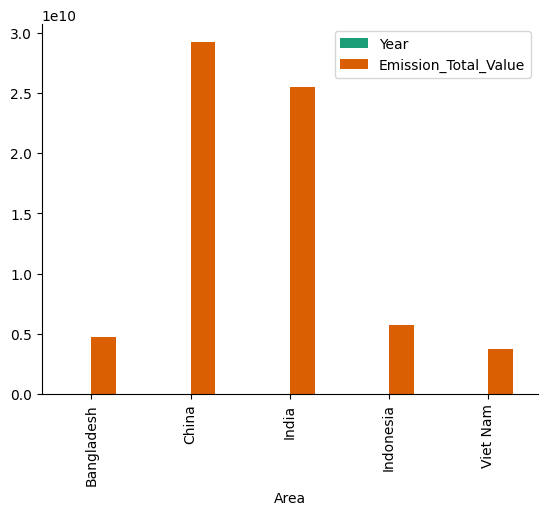

In [82]:
# @title Area

from matplotlib import pyplot as plt
import seaborn as sns
Emission_Total_df.groupby('Area').sum().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

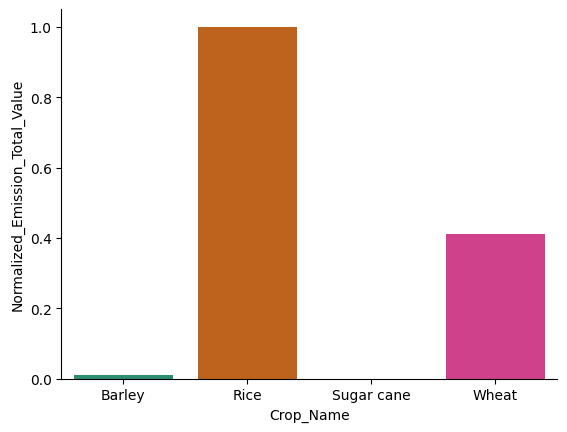

In [92]:
# Group by 'Crop_Name' and sum the values
grouped_df = Emission_Total_df.groupby('Crop_Name').sum()

# Normalize y-values
max_value = grouped_df['Emission_Total_Value'].max()
grouped_df['Normalized_Emission_Total_Value'] = grouped_df['Emission_Total_Value'] / max_value

# Plot using Seaborn barplot
sns.barplot(data=grouped_df.reset_index(), x='Crop_Name', y='Normalized_Emission_Total_Value', palette='Dark2')

# Hide spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


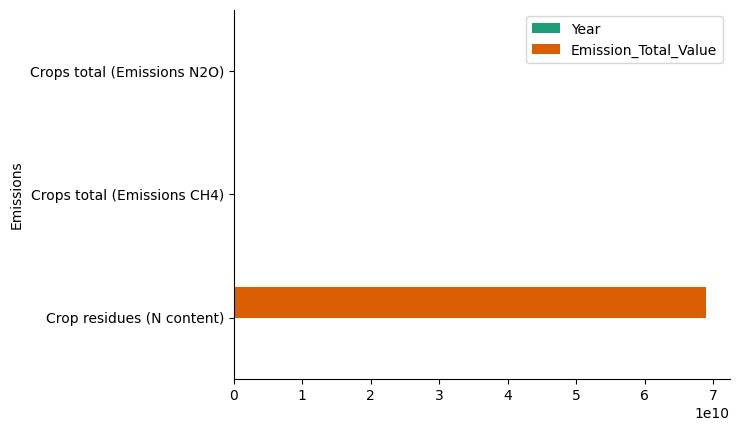

In [97]:
import seaborn as sns
Emission_Total_df.groupby('Emissions').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [100]:
unique_values = {col: Emission_Total_df['Emissions'].unique() for col in Emission_Total_df.columns}
print(unique_values)

{'Area': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Emissions': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Crop_Name': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Year': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Emission_Total_Unit': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Emission_Total_Value': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Emission_Total_Flag': array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crops total (Emissions CH4)'], dtype=object), 'Emission_Total_Flag_Description': array

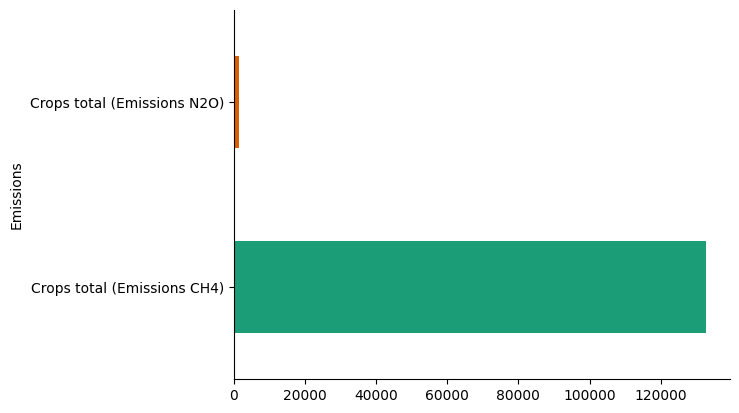

In [104]:
import seaborn as sns
from matplotlib import pyplot as plt

# Filter the dataframe for the two types of values
filtered_df = Emission_Total_df[Emission_Total_df['Emissions'].isin(['Crops total (Emissions N2O)', 'Crops total (Emissions CH4)'])]

# Group by the filtered 'Emissions' column and sum the values
grouped_df = filtered_df.groupby('Emissions').sum()
# grouped_df.head()
# Plot the grouped data
grouped_df['Emission_Total_Value'].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


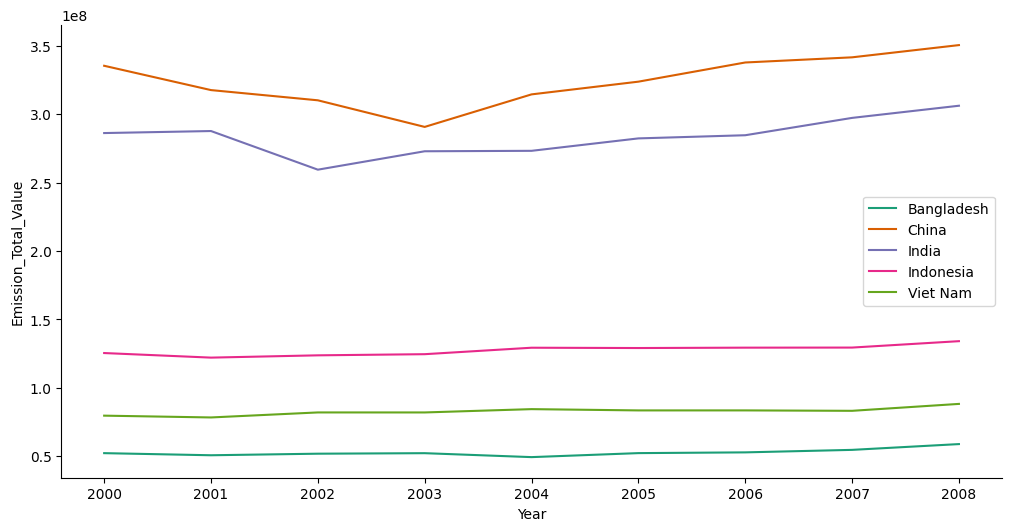

In [107]:
# @title Year vs Emission_Total_Value
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Emission_Total_Value']

    sns.lineplot(x=xs, y=ys, label=series_name, ci=None, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Emission_Total_df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)
    # fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
plt.ylabel('Emission_Total_Value')
plt.show()


In [31]:
Value_of_Agricultural_Production_df= pd.read_csv("/content/drive/MyDrive/Capstone/Datasets/Value_of_Agricultural_Production.csv")
Value_of_Agricultural_Production_df.drop(['Domain','Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code'],  axis=1,inplace=True)
Value_of_Agricultural_Production_df.rename(columns={'Element': 'Production_Value_Type', 'Item': 'Crop_Name', 'Value': 'Production_Value_$', 'Unit': 'Prod_Output_Unit', 'Flag': 'Prod_Output_Flag', 'Flag Description': 'Prod_Output_Flag_Description'}, inplace=True)
Value_of_Agricultural_Production_df = Value_of_Agricultural_Production_df[Value_of_Agricultural_Production_df['Year'].between(2000, 2008)]
Value_of_Agricultural_Production_df= Value_of_Agricultural_Production_df[Value_of_Agricultural_Production_df['Production_Value_Type'].isin(['Gross Production Value (current thousand US$)'])]
# print(Value_of_Agricultural_Production_df['Production_Value_Type'].unique())
Value_of_Agricultural_Production_df.head()

,Area,Production_Value_Type,Crop_Name,Year,Prod_Output_Unit,Production_Value_$,Prod_Output_Flag,Prod_Output_Flag_Description
124,Bangladesh,Gross Production Value (current thousand US$),Barley,2006,1000 USD,154,E,Estimated value
125,Bangladesh,Gross Production Value (current thousand US$),Barley,2007,1000 USD,250,E,Estimated value
342,Bangladesh,Gross Production Value (current thousand US$),Rice,2000,1000 USD,4459731,E,Estimated value
343,Bangladesh,Gross Production Value (current thousand US$),Rice,2001,1000 USD,3918921,E,Estimated value
344,Bangladesh,Gross Production Value (current thousand US$),Rice,2002,1000 USD,4286101,E,Estimated value


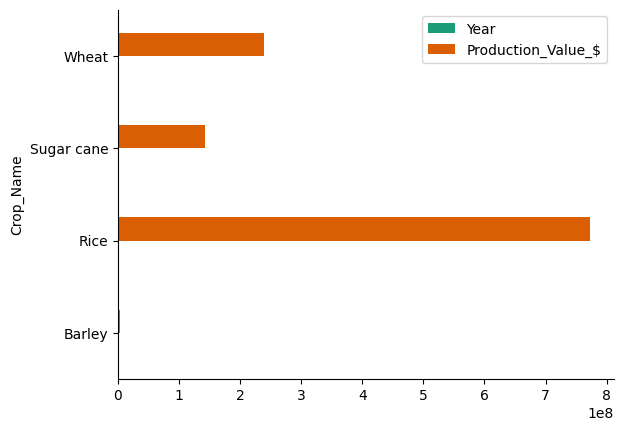

In [108]:
# @title Crop_Name

from matplotlib import pyplot as plt
import seaborn as sns
Value_of_Agricultural_Production_df.groupby('Crop_Name').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

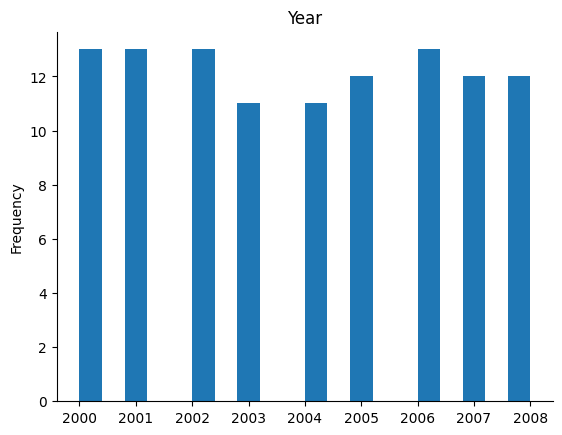

In [33]:
# @title Year

from matplotlib import pyplot as plt
Value_of_Agricultural_Production_df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

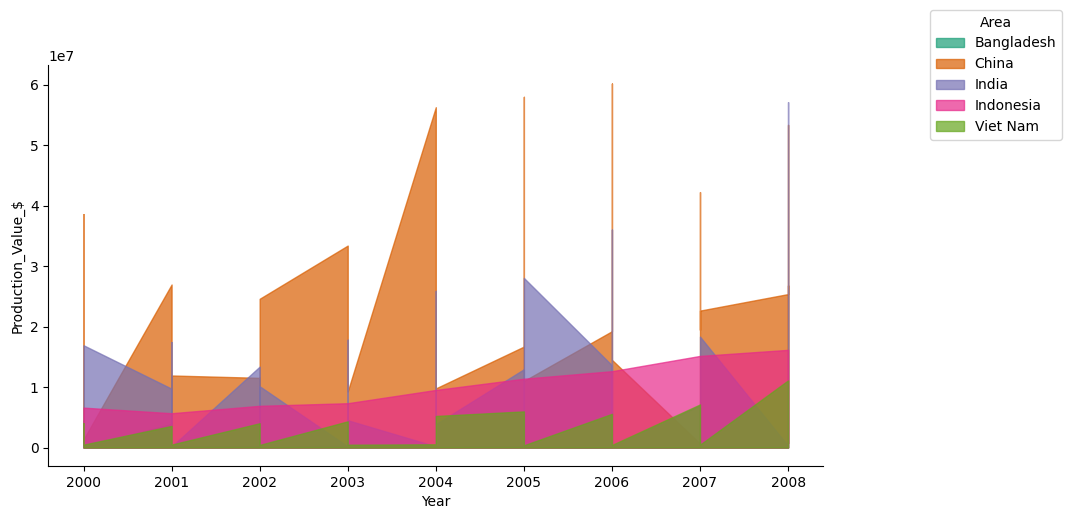

In [110]:
# Function to plot stacked area for each area
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Year']
    ys = series['Production_Value_$']

    plt.fill_between(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5.2))

# Sort the DataFrame by year
df_sorted = Value_of_Agricultural_Production_df.sort_values('Year', ascending=True)

# Iterate over each area and plot its stacked area
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
    _plot_series(series, series_name, i)

# Add legend outside the plot
fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')

# Customize labels and remove spines
plt.xlabel('Year')
plt.ylabel('Production_Value_$')
sns.despine(fig=fig, ax=ax)

plt.show()


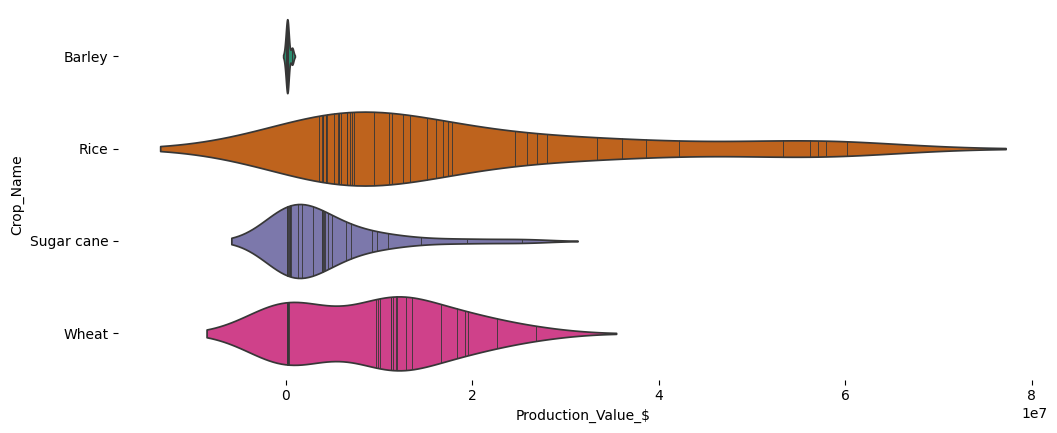

In [111]:
# @title Crop_Name vs Production_Value_$

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Value_of_Agricultural_Production_df['Crop_Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Value_of_Agricultural_Production_df, x='Production_Value_$', y='Crop_Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

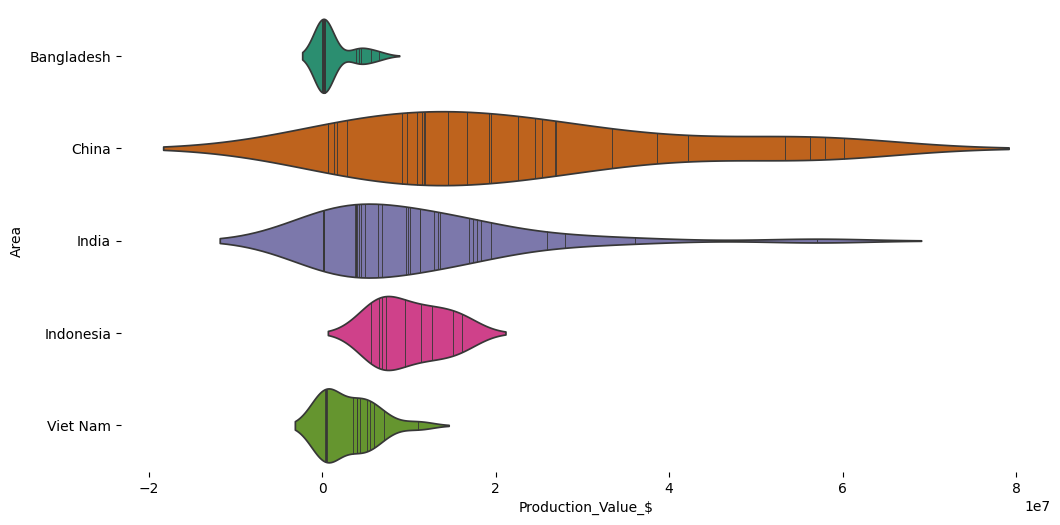

In [112]:
# @title Area vs Production_Value_$

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Value_of_Agricultural_Production_df['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Value_of_Agricultural_Production_df, x='Production_Value_$', y='Area', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
merged_df = pd.merge(Crop_Production_df, Emission_Total_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_Production_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Crop_Land_Nutrient_Balance_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df, Temperature_Change_On_Land_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Land_Use_df, on=['Area', 'Year'], how='inner')

In [38]:
merged_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Crop_Production_Flag,Crop_Production_Flag_Description,Emissions,Emission_Total_Unit,...,TMP_Unit,TMP_Value,TMP_Flag,TMP_Description,Land_Use_Element,Area_type,Land_Use_Unit,Area Value,Land_Use_Flag,Land_Use_Flag_Description
0,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Agricultural land,1000 ha,9280.00,I,Imputed value
1,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Cropland,1000 ha,8680.00,A,Official figure
2,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Share in Agricultural land,Cropland,%,93.53,E,Estimated value
3,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Area,Arable land,1000 ha,7880.00,I,Imputed value
4,Bangladesh,Area harvested,Barley,2006,ha,969.0,A,Official figure,Crops total (Emissions N2O),kt,...,°c,0.7,E,Estimated value,Share in Agricultural land,Arable land,%,84.91,E,Estimated value


In [39]:
merged_df.to_csv('Merged_data.csv', index=False)

In [40]:
merged_df.shape

(2462400, 36)